# Preprocessing

## Import libraries

In [138]:
from sklearn import preprocessing
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
from scipy import stats
from pathlib import Path
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statistics

## Methods

In [2]:
# Helper method that truncate scores to four decimals
def truncate(number, digits) -> float:
    nbDecimals = len(str(number).split('.')[1])
    if nbDecimals <= digits:
        return number
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper

## Setup data

In [3]:
# Load dataset
heart_dataset = pd.read_csv('./heart_2020_cleaned.csv')

# Copy dataset for processing
heart_dataset_preprocessed = heart_dataset.copy()

# Target column name
target_column = 'HeartDisease'

## Get a feeling for the data

First we look at a part of the data, display statistics for the values, look at the correlation between these and print their data types.

In [4]:
display(heart_dataset.head())
display(heart_dataset.describe(include='all'))
display(heart_dataset_preprocessed.corr())
display(heart_dataset.dtypes)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

**Conclusion**

Numerical values: BMI, PhysicalHealth, MentalHealth, SleepTime

None numerical values: HeartDisease(target), Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, AgeCategory, Race, Diabetic, PhysicalActivity, GenHealth, Asthma, KidneyDisease and SkinCancer


Next, we check if there are null values in the data

In [5]:
for column in heart_dataset.columns:
    print(
        "{:<20} {:<2} NaN values".format(column, heart_dataset[column].isna().sum())
    )

HeartDisease         0  NaN values
BMI                  0  NaN values
Smoking              0  NaN values
AlcoholDrinking      0  NaN values
Stroke               0  NaN values
PhysicalHealth       0  NaN values
MentalHealth         0  NaN values
DiffWalking          0  NaN values
Sex                  0  NaN values
AgeCategory          0  NaN values
Race                 0  NaN values
Diabetic             0  NaN values
PhysicalActivity     0  NaN values
GenHealth            0  NaN values
SleepTime            0  NaN values
Asthma               0  NaN values
KidneyDisease        0  NaN values
SkinCancer           0  NaN values


**Conclusion**

No missing values


Next, we look at the target variable and their distribution.

Value      Count      Percentage
No             292422      91.44 %
Yes             27373       8.55 %


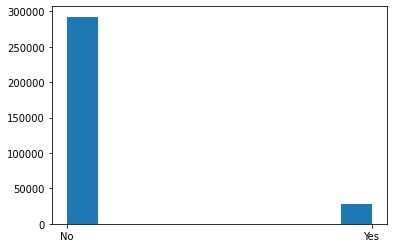

In [6]:
print("{header:<10}".format(header="Value"),
      "{header:<10}".format(header="Count"),
      "{header:<10}".format(header="Percentage")
      )
target_data = heart_dataset_preprocessed[target_column]
for value in target_data.unique():
    value_count = target_data.value_counts()[value]
    percentage_value = value_count/target_data.size*100
    print("{value:<10}".format(value=value),
          "{count:>10}".format(count=value_count),
          "{percentage:>10}".format(percentage=truncate(percentage_value, 2)),
          "%"
          )

plt.hist(heart_dataset_preprocessed[target_column])
plt.show()

**Conclusion**

The target variable has two classes, "Yes" and "No", which are very unbalanced (over 90% are "No"). To avoid giving more importance to the majority class in training, we need to balance the training data later after the train-test split.

## Preprocessing of the target variable

HeartDisease column has two distinct values and is the target variable, so we can use the LabelEncoder for preprocessing.

In [7]:
label_encoder = preprocessing.LabelEncoder()
heart_dataset_preprocessed[target_column] = label_encoder.fit_transform(heart_dataset[target_column])
display(heart_dataset[target_column][0:10])
display(heart_dataset_preprocessed[target_column][0:10])

0     No
1     No
2     No
3     No
4     No
5    Yes
6     No
7     No
8     No
9     No
Name: HeartDisease, dtype: object

0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: HeartDisease, dtype: int32

## Preprocessing of numerical features

Numerical features need to be normalized. We are using the common min-max normalization method to convert the data into a scale ranging from 0 to 1.

In [8]:
# List all numerical features
numerical_features = ["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]

# Use MinMaxScaler to normalize numerical data, as some data isn't normally distributed
scaler = preprocessing.MinMaxScaler()
heart_dataset_preprocessed[numerical_features] = scaler.fit_transform(heart_dataset_preprocessed[numerical_features])

# Quick overview of normalized features
display(heart_dataset_preprocessed[numerical_features].describe())

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.196854,0.112390,0.129946,0.265090
std,0.076737,0.265028,0.265175,0.062435
min,0.000000,0.000000,0.000000,0.000000
25%,0.144996,0.000000,0.000000,0.217391
50%,0.184957,0.000000,0.000000,0.260870
75%,0.234215,0.066667,0.100000,0.304348
max,1.000000,1.000000,1.000000,1.000000


## Preprocessing of the none numerical features

Next we need to look whether the none numerical features are nominal, ordinal or binary, to choose the right encoder. For this we will look at the unique values of each column and then decide.

In [9]:
# List all non-numerical features
none_numerical_features = [
    'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'
]

for feature in none_numerical_features:
    unique_values=heart_dataset_preprocessed[feature].unique()
    print("{feature:<20}".format(feature=feature),
          "{unique_values:<20}".format(unique_values=str(unique_values))
          )

Smoking              ['Yes' 'No']        
AlcoholDrinking      ['No' 'Yes']        
Stroke               ['No' 'Yes']        
DiffWalking          ['No' 'Yes']        
Sex                  ['Female' 'Male']   
AgeCategory          ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race                 ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic             ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity     ['Yes' 'No']        
GenHealth            ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Asthma               ['Yes' 'No']        
KidneyDisease        ['No' 'Yes']        
SkinCancer           ['Yes' 'No']        


**Conclusion:**

Nominal features: Race

Ordinal features:
- AgeCategory: Age has a natural order from low to high
- GenHealth: Has a natural order from poor to excellent
- Diabetic: Yes is more severe than Yes (during pregnancy) more severe than No, borderline diabetes more severe than Yes

Binary features: Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, PhysicalActivity, Asthma, KidneyDisease, SkinCancer

### Encoding ordinal features
Ordinal features have a specific order, so we have to make sure that we encode the features according to that order. For this reason we can't use the sklearn OrdinalEncoder because this encoder uses the alphabetical order which does not fit with our features´ order. That's why we will use a dictionary to define our desired order and apply that order to our features with the pandas .map() function. https://towardsdatascience.com/categorical-encoding-techniques-93ebd18e1f24

#### Diabetic (as ordinal feature, ordered by severity)

Diabetic status may be considered ordinal, as the different states express different severity e.g. only temporarily during pregnancy, having almost diabetic may be viewed as less healthy

In [10]:
# Create dictionary of ordinal to integer mapping
diabetic_order = {'No': 0,
                 'Yes (during pregnancy)': 1/3,
                 'No, borderline diabetes': 2/3,
                 'Yes': 1}

# Apply using map
heart_dataset_preprocessed['Diabetic'] = heart_dataset['Diabetic'].map(diabetic_order)
heart_dataset_preprocessed['Diabetic'].unique()

array([1.        , 0.        , 0.66666667, 0.33333333])

#### AgeCategory

In [11]:
# Create dictionary of ordinal to integer mapping
age_category_order = {'18-24':0,
                      '25-29':1/12,
                      '30-34':2/12,
                      '35-39':3/12,
                      '40-44':4/12,
                      '45-49':5/12,
                      '50-54':6/12,
                      '55-59':7/12,
                      '60-64':8/12,
                      '65-69':9/12,
                      '70-74':10/12,
                      '75-79':11/12,
                      '80 or older':1}

# Using the average of age groups is a standard procedure in econometric literature
# when dealing with age groups (assuming people are getting 110 years old max, but not many 
# so assuming on average 90 years in that age group)
age_category_order = {'18-24': {'avg': 21, 'min': 18, 'max': 24},
                      '25-29': {'avg': 27, 'min': 25, 'max': 29},
                      '30-34': {'avg': 32, 'min': 30, 'max': 34}, 
                     '35-39': {'avg': 37, 'min': 35, 'max': 39},
                      '40-44': {'avg': 42, 'min': 40, 'max': 44},
                      '45-49': {'avg': 47, 'min': 45, 'max': 49}, 
                     '50-54': {'avg': 52, 'min': 50, 'max': 54},
                      '55-59': {'avg': 57, 'min': 55, 'max': 59},
                      '60-64': {'avg': 62, 'min': 60, 'max': 64},
                     '65-69': {'avg': 67, 'min': 65, 'max': 69},
                      '70-74': {'avg': 72, 'min': 70, 'max': 74}, 
                     '75-79': {'avg': 77, 'min': 75, 'max': 79},
                      '80 or older': {'avg': 90, 'min': 80, 'max': 110}}

# Get average of every age group
get_avg = lambda x : age_category_order.get(x).get('avg')

# Apply using map or apply
#heart_dataset_preprocessed['AgeCategory'] = heart_dataset['AgeCategory'].map(age_category_order)
heart_dataset_preprocessed['AgeCategory'] = heart_dataset['AgeCategory'].apply(get_avg)
heart_dataset_preprocessed['AgeCategory']

0         57
1         90
2         67
3         77
4         42
          ..
319790    62
319791    37
319792    47
319793    27
319794    90
Name: AgeCategory, Length: 319795, dtype: int64

#### GenHealth

In [12]:
# Create dictionary of ordinal to integer mapping
gen_health_order = {'Poor':0,
                    'Fair':1/4,
                    'Good':2/4,
                    'Very good':3/4,
                    'Excellent':1}

# Apply using map
heart_dataset_preprocessed['GenHealth'] = heart_dataset['GenHealth'].map(gen_health_order)
heart_dataset_preprocessed['GenHealth']

0         0.75
1         0.75
2         0.25
3         0.50
4         0.75
          ... 
319790    0.25
319791    0.75
319792    0.50
319793    0.50
319794    0.50
Name: GenHealth, Length: 319795, dtype: float64

### Encoding nominal features
Nominal features have no order, so we will use a one-hot-encoder for those features.

In [13]:
nominal_features = ['Race']

# Encoding
one_hot_encoder = preprocessing.OneHotEncoder()
one_hot_encoded = pd.DataFrame(one_hot_encoder.fit_transform(heart_dataset[nominal_features]).toarray(),
                               columns=one_hot_encoder.get_feature_names_out(nominal_features))
# Joining
heart_dataset_preprocessed = heart_dataset_preprocessed.drop(columns=nominal_features)
heart_dataset_preprocessed = heart_dataset_preprocessed.join(one_hot_encoded)
heart_dataset_preprocessed[one_hot_encoder.get_feature_names_out(nominal_features)]

,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
319790,0.0,0.0,0.0,1.0,0.0,0.0
319791,0.0,0.0,0.0,1.0,0.0,0.0
319792,0.0,0.0,0.0,1.0,0.0,0.0
319793,0.0,0.0,0.0,1.0,0.0,0.0


### Encoding binary features
For binary features we want to encode them with 0 and 1, but we have to make sure that we always use the same number for the same value. For example 1 for yes and 0 for no.

#### Yes/No Features

In [14]:
yes_no_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma',
                   'KidneyDisease', 'SkinCancer']

# Encode yes/no features
for feature in yes_no_features:
    heart_dataset_preprocessed[feature] = heart_dataset[feature].replace({'Yes':1, 'No':0})
    
heart_dataset_preprocessed[yes_no_features]

,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,1,0,0,0,1,1,0,1
1,0,0,1,0,1,0,0,0
2,1,0,0,0,1,1,0,0
3,0,0,0,0,0,0,0,1
4,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...
319790,1,0,0,1,0,1,0,0
319791,1,0,0,0,1,1,0,0
319792,0,0,0,0,1,0,0,0
319793,0,0,0,0,0,0,0,0


#### Sex

In [15]:
# Encode Sex feature
heart_dataset_preprocessed['Sex'] = heart_dataset['Sex'].replace({'Female':1, 'Male':0})
heart_dataset_preprocessed['Sex']

0         1
1         1
2         0
3         1
4         1
         ..
319790    0
319791    0
319792    1
319793    1
319794    1
Name: Sex, Length: 319795, dtype: int64

In [16]:
# Quick overview of the encoded data
display(heart_dataset_preprocessed.columns)
display(heart_dataset_preprocessed.head())

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'Race_American Indian/Alaskan Native',
       'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other',
       'Race_White'],
      dtype='object')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,0.055294,1,0,0,0.100000,1.0,0,1,57,...,0.173913,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0.100447,0,0,1,0.000000,0.0,0,1,90,...,0.260870,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0.175782,1,0,0,0.666667,1.0,0,0,67,...,0.304348,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0.147169,0,0,0,0.000000,0.0,0,1,77,...,0.217391,0,0,1,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0.141132,0,0,0,0.933333,0.0,1,1,42,...,0.304348,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


## Clustering

We want to find out if it is beneficial to cluster the data in preprocessing. For this we apply the t-SNE method. With t-SNE high dimensional data can be mapped onto a lower dimension in order to visualize the data. The method uses the t-distribution in order to map points that are close in the high dimensional space also close in the low dimensional space (usually 2-D or 3-D). It uses the t-distribution because of its heavy tails instead of the normal-distribution to reduce the extent of the crowding problem, as the t-distribution places a softer restriction on placing the points in the lower space. 

In [17]:
clustering_model_columns = list(set(heart_dataset_preprocessed.columns) - set(['Race_Other', 'AgeCategory']))
X = heart_dataset_preprocessed[clustering_model_columns].sample(n=5000, random_state=42).dropna()
X_cluster = X.drop(columns=[target_column])

figure = plt.figure(figsize=(20, 10))
figure_index = 1

skip_tsne = True
if skip_tsne:
    # TODO BL: @FL do we really need that much perplexity values? It's pretty time-consuming (around 10 minutes on my machine)
    perplexity_ls = [1, 2, 5, 10, 15, 20, 30, 50]
    for perplexity in perplexity_ls:
        # TODO BL: @FL if possible, please remove the future warning
        tsne = TSNE(n_components=2,
                    learning_rate=5,
                    init='pca',
                    perplexity=perplexity,
                    random_state=42,
                    n_iter=3000,
                    n_jobs=-1
                    )

        X_tsne_embedded = tsne.fit_transform(X_cluster)
        X_tsne_embedded_concat = pd.merge(X, pd.DataFrame(X_tsne_embedded), left_index=True, right_index=True)

        ax = figure.add_subplot(2, 4, figure_index)
        ax.set_title("perplexity: {}".format(perplexity))

        heart_disease_ls = [1, 0]
        for has_heart_disease in heart_disease_ls:
            points_to_plot = X_tsne_embedded_concat.loc[X_tsne_embedded_concat[target_column] == has_heart_disease, :]
            ax.scatter(y=points_to_plot[0], x=points_to_plot[1], label=has_heart_disease)

        ax.legend()
        figure_index += 1

    plt.tight_layout()
    plt.show()

C:\Users\flola\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\flola\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\flola\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


**Conclusion**

TSNE results show that a clustering is not beneficial.

## Visualization

In the next section, we look at the preprocessed data from different angles. The goal is to determine how the features relate to each other and to the target variable.

In [18]:
all_features = heart_dataset_preprocessed.columns[1:]

First we look at the distribution of features.

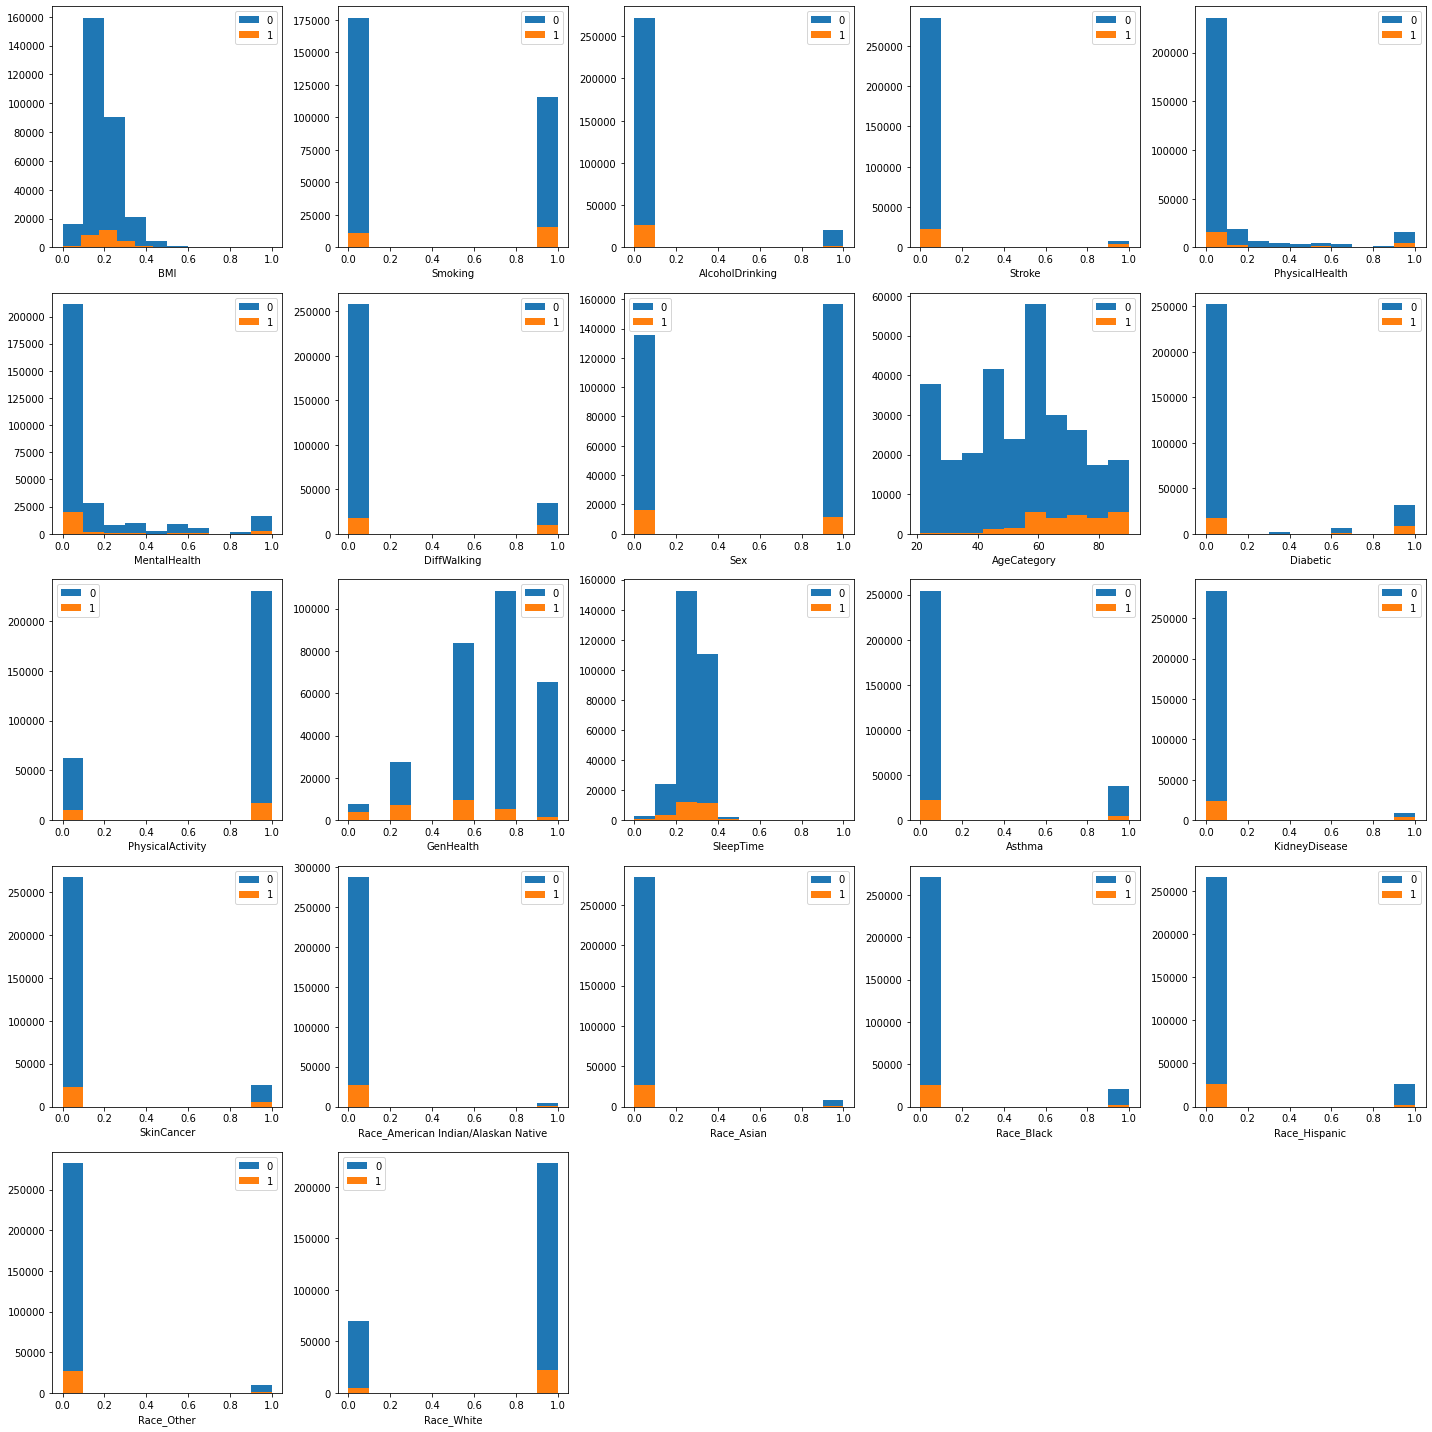

In [19]:
figure_histograms = plt.figure(figsize=(20, 20))
figure_index = 1

for current_feature in all_features:
    ax = figure_histograms.add_subplot(5, 5, figure_index)
    for has_heart_disease, group in heart_dataset_preprocessed.groupby(target_column):
        # plot the data points for the current group and feature combination
        ax.hist(group[current_feature], label=has_heart_disease)
        ax.set_xlabel(current_feature)
        ax.legend()
    figure_index += 1

plt.tight_layout()
plt.show()

We see from the plots that GenHealth as well as BMI are tilted distributions. BMI seems to approach the normal- distribution. Although could also still be considered as being Poisson-distributed. Therefore apply a normalization by squaring the values as recommended in https://stats.stackexchange.com/questions/301587/normalizing-or-standardizing-poisson-data

Only for age and GenHealth by looking at the plots a clear correlation can be seen 

A priori these correlations make sense, as with higher age often heart diseases are the result. However with GenHealth the causality may work in both ways, as having a heart disease obviously has an effect on the general health condition. 

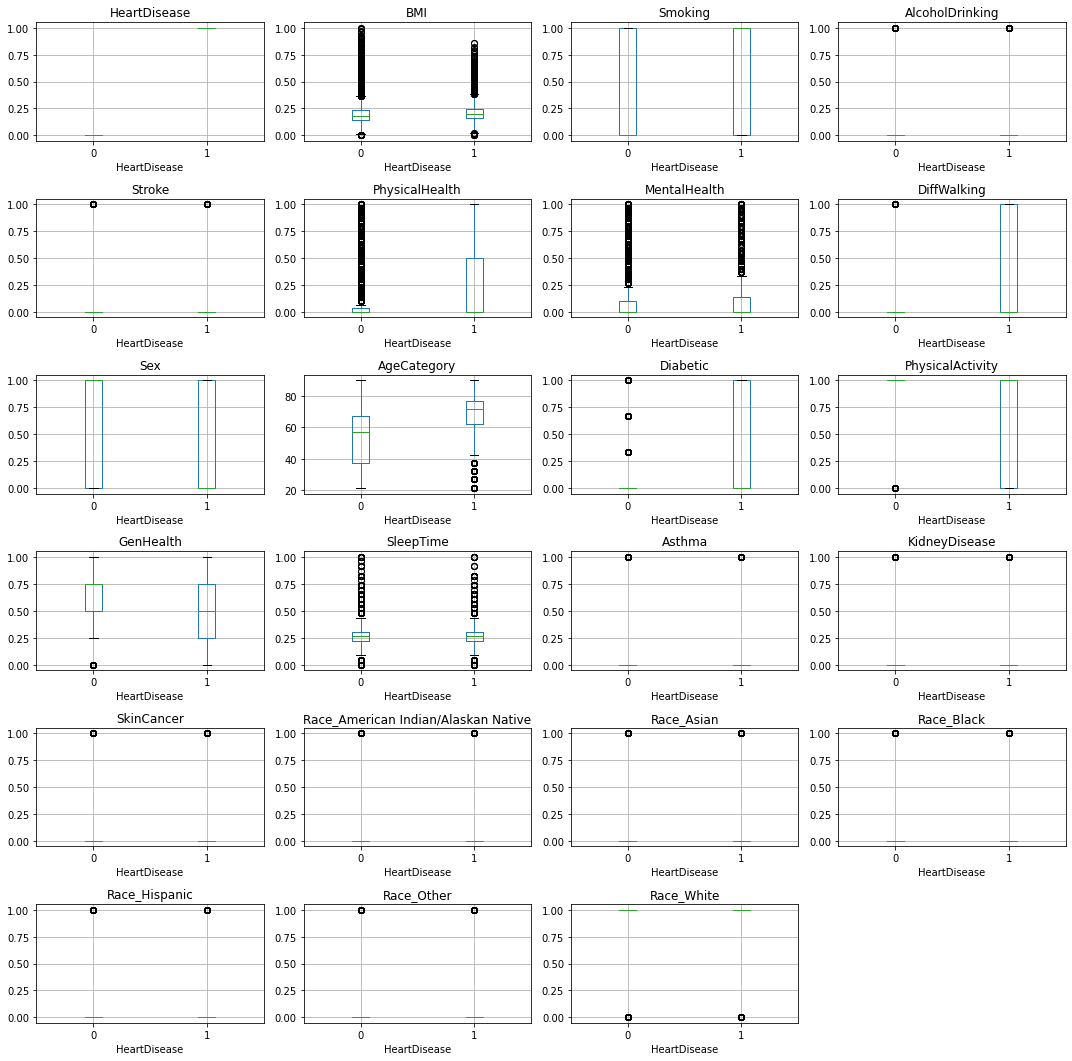

In [21]:
figure_boxplots = plt.figure(figsize=(15, 15))
figure_index = 1

no_columns = len(heart_dataset_preprocessed.columns)
plot_cols = 4
plot_rows = math.ceil(no_columns / 4)

for current_feature in heart_dataset_preprocessed.columns:
    ax = figure_boxplots.add_subplot(plot_rows, plot_cols, figure_index)
    heart_dataset_preprocessed.boxplot(column=[current_feature], by=target_column, ax=ax)
    figure_index += 1

plt.suptitle('')
plt.tight_layout()
plt.show()

**Conclusion**

In the plot below we can see the diagonal correlation matrix, and the correlations two variables have with each other.

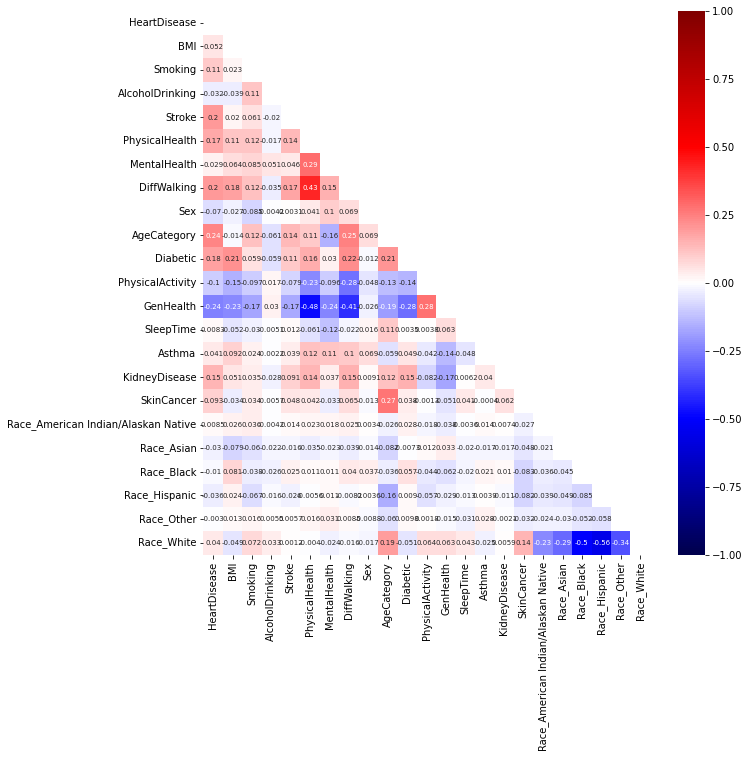

In [23]:
plt.figure(figsize = (10,10))
heart_dataset_preprocessed_corr = heart_dataset_preprocessed.corr()
mask = np.triu(np.ones_like(heart_dataset_preprocessed_corr, dtype=bool))
sns.heatmap(heart_dataset_preprocessed_corr,
            mask=mask,
            vmin=-1,
            vmax=1,
            cmap="seismic",
            annot=True,
            annot_kws={"size": 7})
plt.show()

**Conclusion**

TODO BL: @FL Add conclusion

Next, let's look at the features in the pair plot

<Figure size 720x720 with 0 Axes>

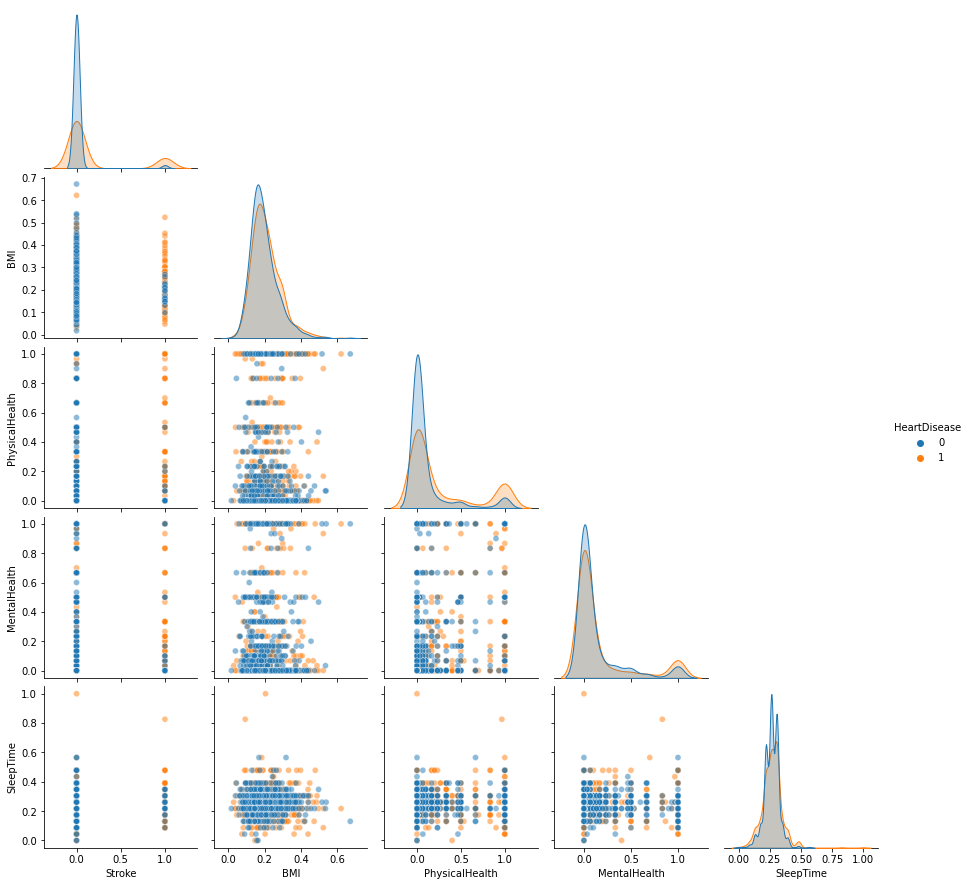

In [24]:
plt.figure(figsize = (10,10))

columns_for_pair_plot = [target_column, "Stroke"] + numerical_features
# BL: @FL please improve - variable that is directly overridden? That's a code smell
# FL: For dataframes this is ok I think, also it is only used in this cell --> so should not be a problem 
equally_distributed_dataset = heart_dataset_preprocessed.loc[heart_dataset_preprocessed[target_column] == 1, columns_for_pair_plot].sample(n=1000, random_state=42)
equally_distributed_dataset = pd.concat([equally_distributed_dataset, heart_dataset_preprocessed.loc[heart_dataset_preprocessed[target_column] == 0, columns_for_pair_plot].sample(n=1000, random_state=42)])

hue_order = [0, 1]
sns.pairplot(equally_distributed_dataset, hue=target_column, hue_order=hue_order, corner=True, plot_kws={'alpha': 0.5})

plt.show()

C:\Users\flola\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


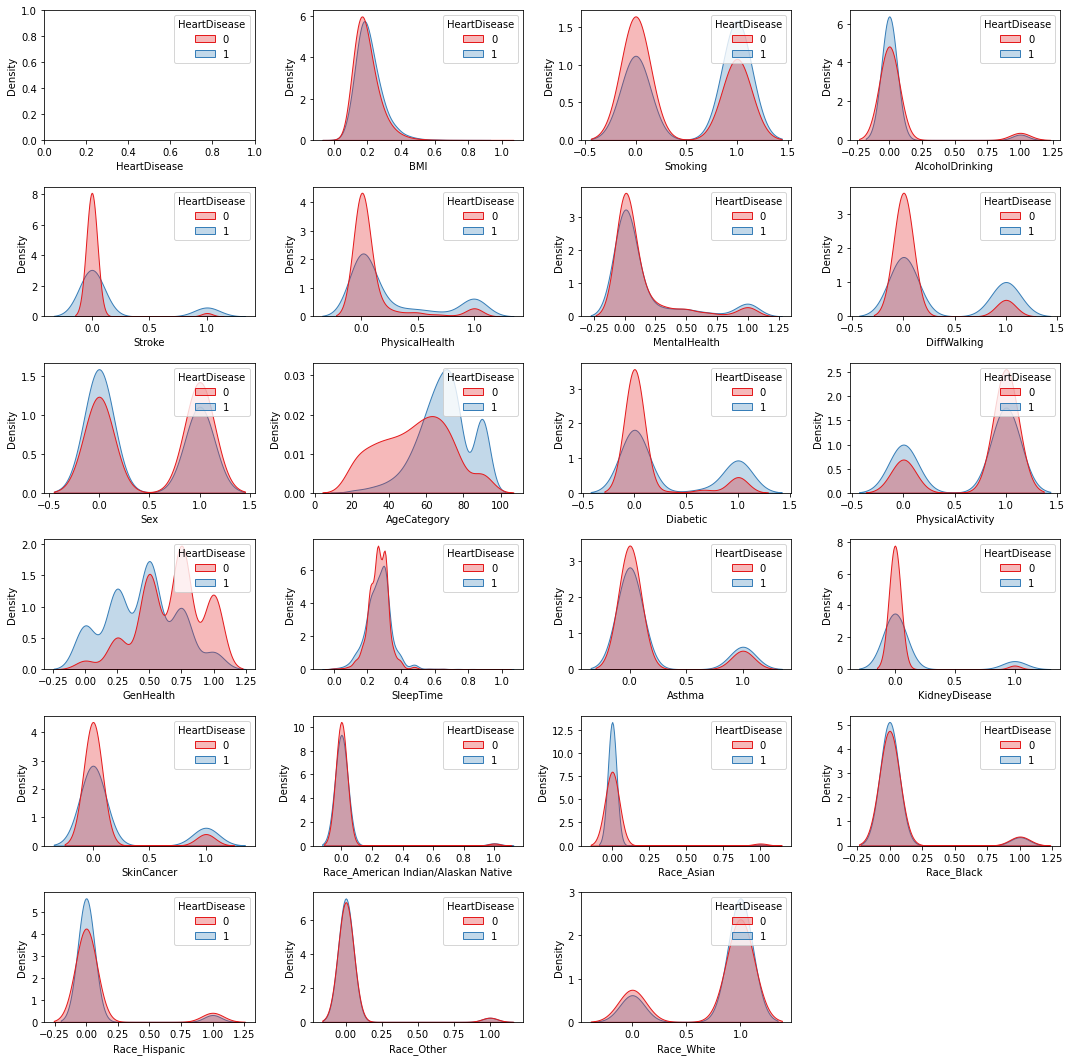

In [25]:
figure_displots = plt.figure(figsize=(15, 15))
figure_index = 1

no_columns = len(heart_dataset_preprocessed.columns)
plot_cols = 4
plot_rows = math.ceil(no_columns / 4)

for current_feature in heart_dataset_preprocessed.columns:
    ax = figure_displots.add_subplot(plot_rows, plot_cols, figure_index)
    sns.kdeplot(data=heart_dataset_preprocessed, x=current_feature, hue=target_column,
                    fill=True, common_norm=False, palette="Set1", alpha=.3, linewidth=1, bw_method=0.3)
    figure_index += 1

plt.suptitle('')
plt.tight_layout()
plt.show()

From these distribution plots we can see that the columns:
- 

**Conclusion**

TODO BL: @FL Add conclusion

TODO BL: @FL please add description what you are doing in the following section; improve code quality and consistency according to the sections above, e.g., by putting several representations in one figure; remove errors and warnings

In [251]:
subset_data = heart_dataset_preprocessed.sample(n=1000, random_state=42)


<AxesSubplot:xlabel='GenHealth', ylabel='PhysicalHealth'>

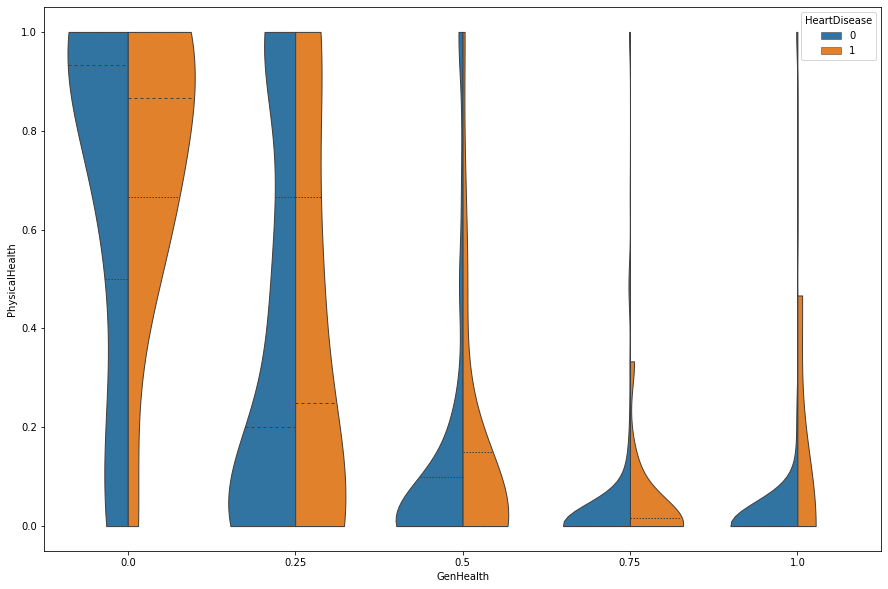

In [28]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.violinplot(data=subset_data, x="GenHealth", y="PhysicalHealth", hue=target_column, split=True, inner="quart", linewidth=1, cut=0)

<AxesSubplot:xlabel='GenHealth', ylabel='MentalHealth'>

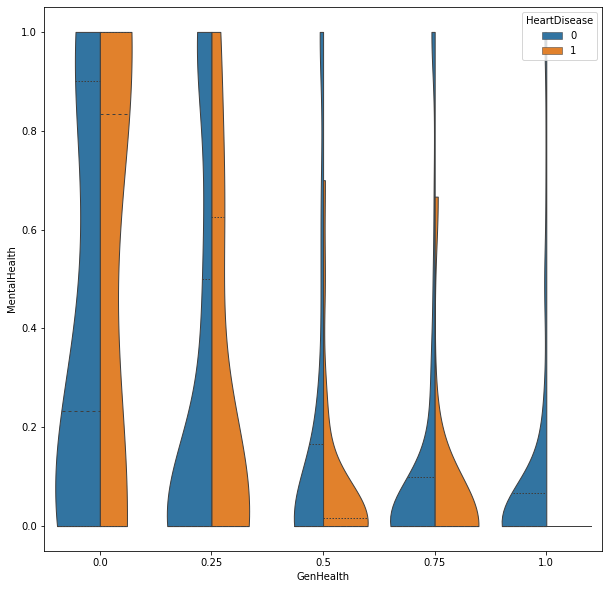

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.violinplot(data=subset_data, x="GenHealth", y="MentalHealth", hue=target_column, split=True, inner="quart", linewidth=1, cut=0)

<AxesSubplot:xlabel='DiffWalking', ylabel='PhysicalHealth'>

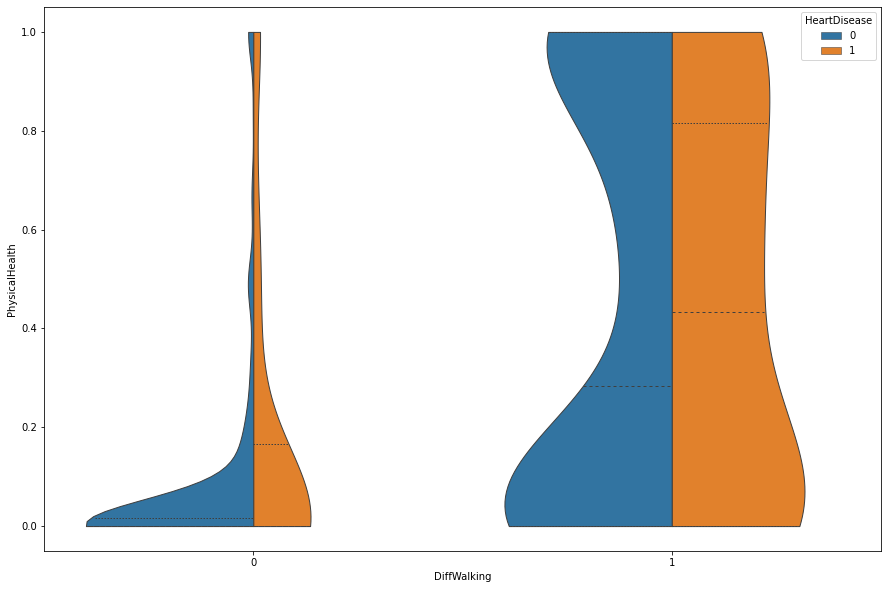

In [32]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.violinplot(data=subset_data, x="DiffWalking", y="PhysicalHealth", hue=target_column, split=True, inner="quart", linewidth=1, cut=0)

From the violinplot above one can observe that for having a heart disease the median and the quartiles are shifted upwards for both possible values of *DiffWalking*. However the extent of the effect that can be attributed to *DiffWalking* is not clear from this plot.

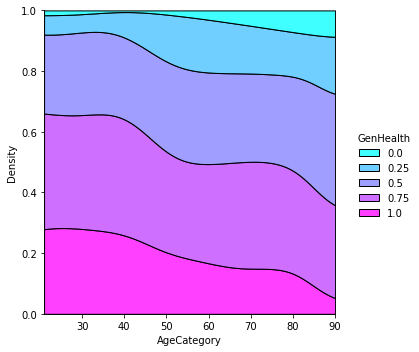

In [246]:
sns.displot(
    data=subset_data,
    x="AgeCategory", hue="GenHealth",
    kind="kde", multiple="fill", palette="cool", **{"bw_method":0.4, "cut":0})

In the plot above we can observe the clear negative correlation of *GenHealth* and *AgeCategory*. We also may observe in this plot that the relation is non-linear e.g. the having good health has a clear plateau structure at about 50 to 70 years of age. Therefore modeling GenHealth and AgeCategory with an interaction term might be explored.

### Doing some statistical tests 

For each continous variable of the dataset a t-test may be performed to check if for the *HeartDisease* values (yes/no) the distributions differ. By using this test, one can observe if the distribution of values for that variable significantly differs conditioned on the status of having a heart disease. The condition of the t-test having equal variance may probably be validated. 

For each bivariate variable a chi-squared test is performed. This is done as the chi-squared test is designed to be performed on contingency tables. Indeed one such table is formed by taking the bivariate variable and the condition of having a heart disease. 

In [200]:
race_features = ['Race_American Indian/Alaskan Native', 'Race_Asian', 
                 'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White']

ordinal_columns = ["Diabetic", "GenHealth"]

t_test_cols = numerical_features + ["AgeCategory"]
chi_squared_cols = yes_no_features + race_features + ["Sex"]


remaining_cols = set(heart_dataset_preprocessed.columns) - set(t_test_cols) - set(chi_squared_cols
                                    ) - set([target_column]) - set(ordinal_columns)

print(remaining_cols)
print("t-test columns: {}".format(t_test_cols))
print("chi-squared columns: {}".format(chi_squared_cols))
print("ordinal columns: {}".format(ordinal_columns))


set()
t-test columns: ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'AgeCategory']
chi-squared columns: ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer', 'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White', 'Sex']
ordinal columns: ['Diabetic', 'GenHealth']


In [208]:
headers = ["t-test for column", "t-test statistic", "p-value"]
print_template = ""
for i in range(len(headers)):
    if i == 0: 
        k = max(len(max(heart_dataset_preprocessed.columns, key=len)), len(headers[i]))
    else:
        k = len(headers[i])
    print_template += "{" + str(i) + ":" + str(k+2) + "}|"
print_template = print_template[:-1]
print(print_template.format("t-test for column", "t-test statistic", "p-value"))
# taking a sample so the t-test not finding arbitrarily low differences at a very high significance level 
n = 1000
random_state = 42
for col in t_test_cols:
    has_heart_disease = heart_dataset_preprocessed.loc[heart_dataset_preprocessed[target_column] == 1, col].sample(n=n, random_state=random_state)
    has_not_heart_disease = heart_dataset_preprocessed.loc[heart_dataset_preprocessed[target_column] == 0, col].sample(n=n, random_state=random_state)
    t_test_statistic, t_test_p_val = stats.ttest_ind(has_heart_disease, has_not_heart_disease)
    print(print_template.format(col, round(t_test_statistic, 3), round(t_test_p_val, 3)))

t-test for column                    |t-test statistic  |p-value  
BMI                                  |             3.744|      0.0
PhysicalHealth                       |            11.063|      0.0
MentalHealth                         |             2.637|    0.008
SleepTime                            |             0.917|    0.359
AgeCategory                          |            22.485|      0.0


In [227]:
headers = ["chi-squared test for column", "chi-squared test statistic", "p-value"]
print_template = ""
for i in range(len(headers)):
    if i == 0: 
        k = max(len(max(heart_dataset_preprocessed.columns, key=len)), len(headers[i]))
    else:
        k = len(headers[i])
    print_template += "{" + str(i) + ":" + str(k+2) + "}|"
print_template = print_template[:-1]
print(print_template.format("chi-squared test for column", "chi-squared test statistic", "p-value"))
# taking a sample so the chi-squared test finds not arbitrarily low differences at very high significance levels (same as for the t-test)
n = 100
random_state = 42
for col in chi_squared_cols:
    has_heart_disease = heart_dataset_preprocessed.loc[heart_dataset_preprocessed[target_column] == 1, col].sample(n=n, random_state=random_state).to_list()
    has_not_heart_disease = heart_dataset_preprocessed.loc[heart_dataset_preprocessed[target_column] == 0, col].sample(n=n, random_state=random_state).to_list()
    chi_test_df = pd.DataFrame({"HD":has_heart_disease, "!HD":has_not_heart_disease})
    
    f_obs, f_exp = [sum(has_heart_disease), n - sum(has_heart_disease)], [sum(has_not_heart_disease), n - sum(has_not_heart_disease)]
    #print(f_obs, f_exp )
    #print(len(has_heart_disease), len(has_not_heart_disease))
    test_statistic, test_p_val = stats.chisquare(f_obs=f_obs, f_exp=f_exp)
    print(print_template.format(col, round(test_statistic, 3), round(test_p_val, 3)))

chi-squared test for column          |chi-squared test statistic  |p-value  
Smoking                              |                       7.919|    0.005
AlcoholDrinking                      |                        5.53|    0.019
Stroke                               |                      58.594|      0.0
DiffWalking                          |                      58.836|      0.0
PhysicalActivity                     |                       5.828|    0.016
Asthma                               |                       0.409|    0.523
KidneyDisease                        |                      21.094|      0.0
SkinCancer                           |                       12.21|      0.0
Race_American Indian/Alaskan Native  |                        1.01|    0.315
Race_Asian                           |                       1.596|    0.207
Race_Black                           |                       2.458|    0.117
Race_Hispanic                        |                       0.177|    0.674

In [212]:
headers = ["Wilcoxon test for column", "Wilcoxon test statistic", "p-value"]
print_template = ""
for i in range(len(headers)):
    if i == 0: 
        k = max(len(max(heart_dataset_preprocessed.columns, key=len)), len(headers[i]))
    else:
        k = len(headers[i])
    print_template += "{" + str(i) + ":" + str(k+2) + "}|"
print_template = print_template[:-1]
print(print_template.format("Wilcoxon test for column", "Wilcoxon test statistic", "p-value"))
# taking a sample so the chi-squared test finds not arbitrarily low differences at very high significance levels (same as for the t-test)
n = 100
random_state = 42
for col in ordinal_columns:
    has_heart_disease = heart_dataset_preprocessed.loc[heart_dataset_preprocessed[target_column] == 1, col].sample(n=n, random_state=random_state)
    has_not_heart_disease = heart_dataset_preprocessed.loc[heart_dataset_preprocessed[target_column] == 0, col].sample(n=n, random_state=random_state)
    test_statistic, test_p_val = stats.wilcoxon(x=has_heart_disease, y=has_not_heart_disease)
    print(print_template.format(col, round(test_statistic, 3), round(test_p_val, 3)))

Wilcoxon test for column             |Wilcoxon test statistic  |p-value  
Diabetic                             |                    171.5|      0.0
GenHealth                            |                    615.5|      0.0


**Conclusion**

TODO BL: @FL Add conclusion

## Feature Selection

Our dataset has many features. A core aspect of preprocessing is feature selection. Based on the previous visualization and the conclusions derived from it, unimportant features are now removed and new features are created by using interaction effects.

As the Race columns from the dataset seem to have an effect mainly due to differences in age or the higher risk of having skin cancer of light coloured (white) people. And those effects being already captured by other variables in our dataset. These will be dropped, in order to lower the multicolliearity and apply Occam's Razor 

We can also observe that *Sleep Time* has a very low correlation to almost all of the variables instead of *Age Category* and *Mental Health* having 0.11 and -0.12 respectively. The correlation for *HeartDisease* is especially low being 0.0053. In combination with the high p-value for the t-test, we decided to drop this variable. 

Furthermore one can observe that the correlation for *Mental Health* with *HeartDisease* is about 0.03, also there is a high correlation with *Physical Health*, *Gen Health*,  so we expect a model that already includes this variable, benefits less from the inclusion of *Mental Health*. Due to the low correlation with the target variable *HeartDisease* and the multicollinearity to one included variable we exclude *Mental Health* as an explanatory variable.  

The variable *AlcoholDrinking* only has a correlation higher than 0.1 with *Smoking*, thus this variable is also excluded. However a new variable is being constructed capturing the state of smoking and alcohol drinking together to form an instrument of less healthy behaviour. Although this variable reported very low correlations so it was excluded again. Due to the significance of the chi-squared test, the variable is kept.

The variable *Smoking* itself is still included as it is listed by the CDC as one major risk indicator https://www.cdc.gov/heartdisease/risk_factors.htm . However it is merged with the *Asthma* variable as both have low correlations and may be a indicators of having risks for lung and breathing related diseases. Otherwise the variable *Asthma* would have needed to be excluded, due to its poor performance in the chi-squared test.

Finally the *Sex* column has quite low correlations with the other variables and also with our target variable *HeartDisease*. But the chi-square test result was significant also for just 100 samples. Thus the variable is kept.

In [133]:
heart_ds_prep_reduced = heart_dataset_preprocessed.copy()
#heart_ds_prep_reduced["riskpos_behaviour"] = heart_ds_prep_reduced["AlcoholDrinking"] * heart_ds_prep_reduced["Smoking"]

heart_ds_prep_reduced["breathing_risk"] = heart_ds_prep_reduced["Smoking"] | heart_ds_prep_reduced["Asthma"] 

columns_to_drop = ["MentalHealth", "SleepTime", "Smoking", "Asthma", "Race_White", "Race_Black", 
                   "Race_Asian", "Race_American Indian/Alaskan Native", "Race_Hispanic", "Race_Other"]
heart_ds_prep_reduced = heart_ds_prep_reduced.drop(columns_to_drop, axis=1)

heart_ds_prep_reduced.head()

,HeartDisease,BMI,Stroke,PhysicalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,GenHealth,KidneyDisease,SkinCancer,breathing_risk
0,0,0.055294,0,0.100000,0,57,1.0,1,0.75,0,1,1
1,0,0.100447,1,0.000000,0,90,0.0,1,0.75,0,0,0
2,0,0.175782,0,0.666667,0,67,1.0,1,0.25,0,0,1
3,0,0.147169,0,0.000000,0,77,0.0,0,0.50,0,1,0
4,0,0.141132,0,0.933333,1,42,0.0,1,0.75,0,0,0


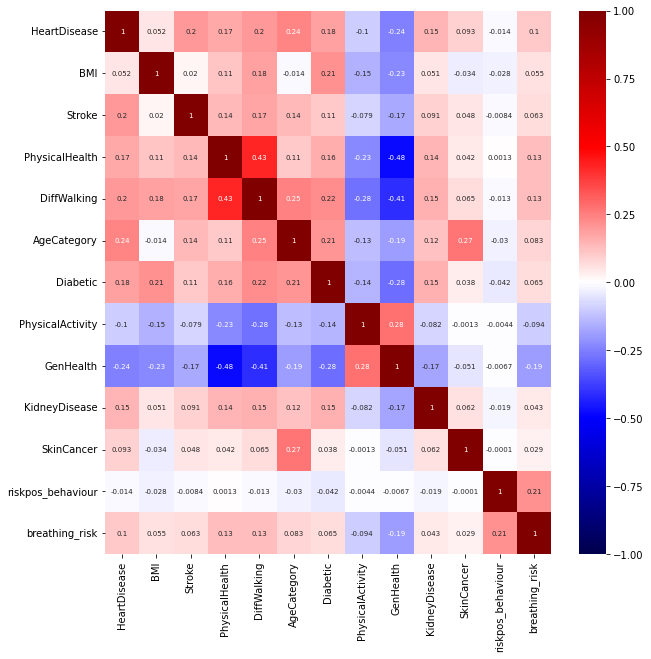

In [56]:
plt.figure(figsize = (10,10))
heart_dataset_preprocessed_corr = heart_ds_prep_reduced.corr()
mask = np.triu(np.ones_like(heart_dataset_preprocessed_corr, dtype=bool))
sns.heatmap(heart_dataset_preprocessed_corr,
            #mask=mask,
            vmin=-1,
            vmax=1,
            cmap="seismic",
            annot=True,
            annot_kws={"size": 7})
plt.show()

In [248]:
heart_ds_prep_reduced["BMI_sqrt"] = heart_ds_prep_reduced["BMI"].apply(math.sqrt)
res_vals, lambda_res = stats.boxcox(heart_ds_prep_reduced["PhysicalHealth"].apply(lambda x : x+0.1).to_numpy())
print("The resulting lambda from the Box-Cox transformation is: {}".format(lambda_res))
heart_ds_prep_reduced["PhysicalHealth_boxcox"] = res_vals
heart_ds_prep_reduced["GenHealth_squared"] = heart_ds_prep_reduced["GenHealth"] ** 2

columns_to_z_scale = ["BMI_sqrt", "GenHealth_squared"]
z_scaler = preprocessing.StandardScaler()
for col in columns_to_z_scale:
    heart_ds_prep_reduced[col] = z_scaler.fit_transform(heart_ds_prep_reduced[col].to_numpy().reshape(-1, 1))

heart_ds_prep_reduced["GenHealth_squared_x_Age"] = heart_ds_prep_reduced["GenHealth_squared"] * heart_ds_prep_reduced["AgeCategory"]

The resulting lambda from the Box-Cox transformation is: -2.1612092578482285


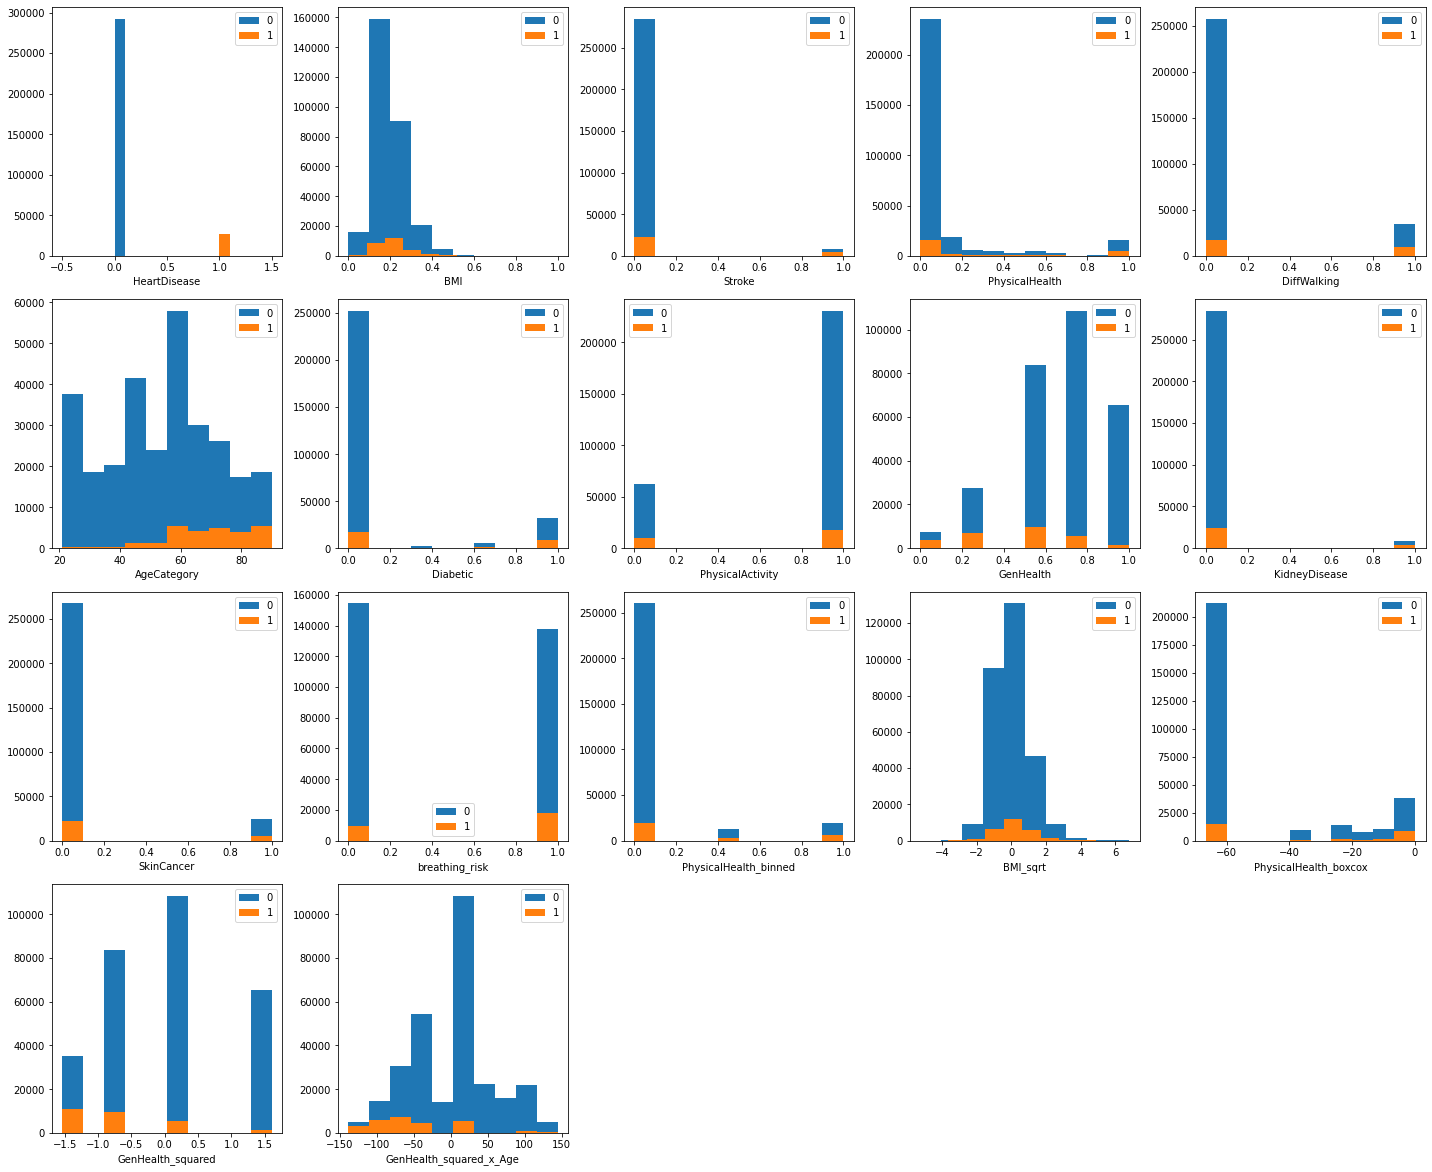

In [249]:
figure_histograms = plt.figure(figsize=(20, 20))
figure_index = 1

df = heart_ds_prep_reduced
for current_feature in df.columns:
    ax = figure_histograms.add_subplot(5, 5, figure_index)
    for has_heart_disease, group in df.groupby(target_column):
        # plot the data points for the current group and feature combination
        ax.hist(group[current_feature], label=has_heart_disease)
        ax.set_xlabel(current_feature)
        ax.legend()
    figure_index += 1

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='PhysicalHealth', ylabel='Count'>

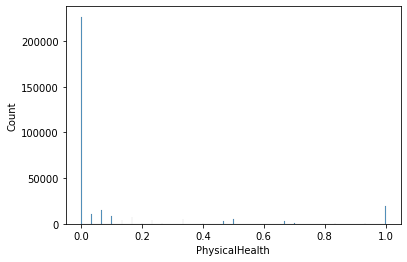

In [124]:
sns.histplot(data=heart_ds_prep_reduced, x="PhysicalHealth")

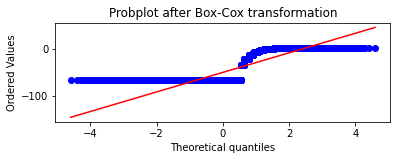

In [123]:
fig = plt.figure()
ax2 = fig.add_subplot(212)
prob = stats.probplot(heart_ds_prep_reduced["PhysicalHealth_boxcox"], dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

plt.show()

As even the Box Cox transformation results in unsatisfying results, binning is advised to assign the values in between either one or zero. Therefore the values are assigned into one of three equally sized brackets.  Each value is assigned in one bracket. Afterwards the values of the bracket are assigned the median of values in the bracket. 

In [179]:
heart_ds_prep_reduced["PhysicalHealth_binned"] = heart_ds_prep_reduced["PhysicalHealth"].copy()

first_bin_sel = heart_ds_prep_reduced["PhysicalHealth"] < 0.33
second_bin_sel = (heart_ds_prep_reduced["PhysicalHealth"] >= 0.33) & (heart_ds_prep_reduced["PhysicalHealth"] < 0.66)
third_bin_sel = heart_ds_prep_reduced["PhysicalHealth"] >= 0.66

physical_health_ser = heart_ds_prep_reduced["PhysicalHealth"]

heart_ds_prep_reduced.loc[first_bin_sel, "PhysicalHealth_binned"] = statistics.median(physical_health_ser.loc[first_bin_sel])
heart_ds_prep_reduced.loc[second_bin_sel, "PhysicalHealth_binned"]= statistics.median(physical_health_ser.loc[second_bin_sel])
heart_ds_prep_reduced.loc[third_bin_sel, "PhysicalHealth_binned"] = statistics.median(physical_health_ser.loc[third_bin_sel])

print(heart_ds_prep_reduced["PhysicalHealth_binned"].unique())
print("done")

[0.         1.         0.46666667]
done


<AxesSubplot:xlabel='PhysicalHealth_binned', ylabel='Count'>

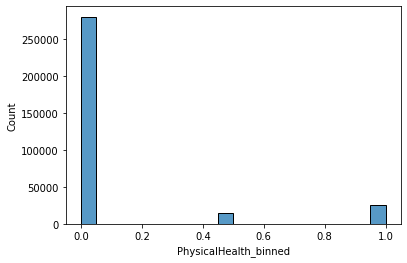

In [180]:
sns.histplot(data=heart_ds_prep_reduced, x="PhysicalHealth_binned")

In [250]:
# finally dropping some columns
print(heart_ds_prep_reduced.columns)

further_columns_to_drop = ["BMI", "PhysicalHealth", "GenHealth", "HeartDisease"]
heart_ds_prep_reduced = heart_ds_prep_reduced.drop(further_columns_to_drop, axis=1)

Index(['HeartDisease', 'BMI', 'Stroke', 'PhysicalHealth', 'DiffWalking',
       'AgeCategory', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'KidneyDisease', 'SkinCancer', 'breathing_risk',
       'PhysicalHealth_binned', 'BMI_sqrt', 'PhysicalHealth_boxcox',
       'GenHealth_squared', 'GenHealth_squared_x_Age'],
      dtype='object')


Now we are through with the preprocessing and can save the preprocessed dataset.

In [ ]:
# Save preprocessed data
filepath = Path('./heart_dataset_preprocessed.csv')
heart_dataset_preprocessed.to_csv(filepath, index=False)

filepath = Path('./heart_dataset_preprocessed_reduced.csv')
heart_ds_prep_reduced.to_csv(filepath, index=False)